In [38]:
import pandas as pd
import numpy as np
import plotly.express as px

In [39]:
emmissions=pd.read_excel('/Users/graceegeorge/5030UndestandingUncertaintyTeam/5030UndestandingUncertaintyTeam/emissions_by_unit_and_fuel_type_c_d_aa.xlsb',sheet_name='UNIT_DATA',skiprows=6)

In [40]:
emmissions.columns

Index(['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State',
       'Primary NAICS Code', 'Reporting Year', 'Industry Type (subparts)',
       'Industry Type (sectors)', 'Unit Name', 'Unit Type',
       'Unit Reporting Method',
       'Unit Maximum Rated Heat Input Capacity (mmBTU/hr)',
       'Unit CO2 emissions (non-biogenic) ', 'Unit Methane (CH4) emissions ',
       'Unit Nitrous Oxide (N2O) emissions ',
       'Unit Biogenic CO2 emissions (metric tons)'],
      dtype='object')

In [41]:
state_list=list(emmissions['State'].unique())
len(state_list)

54

In [42]:
emmissions['State'].unique()

array(['IN', 'CA', 'NY', 'NM', 'TX', 'IL', 'MN', 'AL', 'WI', 'AR', 'MO',
       'NC', 'MI', 'WY', 'VA', 'OH', 'AZ', 'PR', 'SD', 'KS', 'MD', 'IA',
       'LA', 'MS', 'ID', 'ND', 'TN', 'GA', 'WV', 'PA', 'HI', 'OK', 'KY',
       'UT', 'NE', 'VT', 'WA', 'SC', 'AK', 'FL', 'CT', 'OR', 'CO', 'MA',
       'NH', 'NJ', 'NV', 'MT', 'DE', 'ME', 'DC', 'RI', 'GU', 'VI'],
      dtype=object)

In [43]:
# Found online
states_map = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [51]:
emmissions['Unit CO2 emissions (non-biogenic) '].describe()

count    2.687780e+05
mean     1.127478e+05
std      4.548551e+05
min      0.000000e+00
25%      1.361000e+02
50%      5.978750e+03
75%      4.241188e+04
max      1.774929e+07
Name: Unit CO2 emissions (non-biogenic) , dtype: float64

In [45]:
emmissions['State'] = emmissions['State'].replace(states_map)

In [54]:
emmissions['State'].head()

0       Indiana
1    California
2    California
3    California
4    California
Name: State, dtype: object

In [ ]:
px.scatter(emmissions,x='State',y='Unit CO2 emissions (non-biogenic) ')

In [67]:
state_means=emmissions.groupby('State')['Unit CO2 emissions (non-biogenic) '].mean()
means_list=list(state_means)


In [71]:
import seaborn as sns
import matlibplot.pyplot as plt
sns.kdeplot(means_list)

ModuleNotFoundError: No module named 'matlibplot'

<Axes: ylabel='Proportion'>

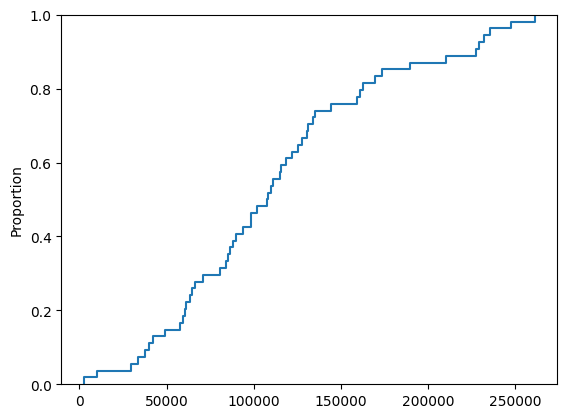

In [69]:
sns.ecdfplot (means_list)

In [ ]:
n=1000
for i in range n:
        


In [ ]:
def simulate(var, df, fcn, S=1000, plot=True): # Taking a sample the df data
                                                # applying the fcn function S times and 
                                                # makes plot of results
    ''' Bootstrap simulation code. '''    
    x = df[var]     #Sets the variable being bootstrapped

    estimates = []     # Sets an place to store bootrapped estimates
    for s in range(S): # Takes S samples
        x_s = x.sample(frac=1.0,replace=True) # Takes a sample of x's while replacing each time
        stat_s = fcn(x_s) #Takes the desired stat of each variable
        estimates.append(stat_s) # Stores each estimated stat in a list
    estimates = np.array(estimates) # Convert estimates list to numpy array

    ## or in one line, 

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # sets dimension of figures
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data') # Makes a kde of the data(not sampled)
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics') # Makes a kde of the bootstapimg
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--') # Data visualization
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics') # Makes an ecdf of the bootrapped stats
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--') # Data visualization
        plt.show() # Prints the graphs
        print(f'Variance of estimates is: {np.var(estimates)}') # Prints the variance of the estimates
        
    return estimates # Returns the list that stored the estimates